In [10]:
# Import packages and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [11]:
# Load the dataset
rent_all = pd.read_csv('rent18.csv')

# Keep subset of features, and drop missing values
rent = rent_all[['price', 'beds', 'baths', 'sqft','room_in_apt']].dropna()
rent.head() #displays the first few rows of the modified DataFrame to check the results

,price,beds,baths,sqft,room_in_apt
1,2500,2.0,1.0,1050.0,0
6,3000,3.0,1.5,1100.0,0
7,2743,2.0,2.0,1120.0,0
9,1800,2.0,1.0,650.0,0
13,2950,2.0,1.0,800.0,0


Use simple linear regression to predict rental price from square footage.

In [12]:
# Define input and output features for predicting price based on square footage
X = rent[['sqft']].values.reshape(-1, 1)
y = rent[['price']].values.reshape(-1, 1)

In [13]:
# Initialize a simple linear regression model
simpLinModel = LinearRegression()

In [14]:
# Fit a simple linear regression model
simpLinModel.fit(X, y)

LinearRegression()

# Fit a simple linear regression model

In [15]:
# Print the intercept weight for the model
# Estimated intercept weight
print('w0: ', simpLinModel.intercept_)

w0:  [1373.78577471]


In [16]:
# Estimated weight for sqft feature
print('w1: ', simpLinModel.coef_)

w1:  [[1.5875292]]


In [17]:
# Find predicted values by the model
yPredicted = simpLinModel.predict(X)

# Print the predicted price of a 2,500 square foot rental
print("Predicted Price of a 2,500 sqft Rental: ", simpLinModel.predict([[2500]]))

Predicted Price of a 2,500 sqft Rental:  [[5342.60877778]]


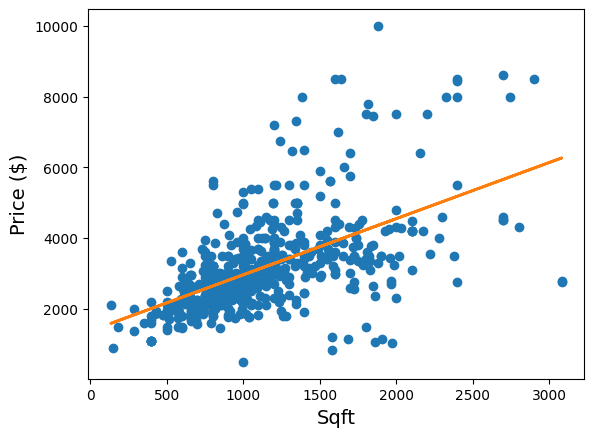

In [18]:
# Plot data and fitted model

plt.scatter(X, y, color='#1f77b4')
plt.plot(X, yPredicted, color='#ff7f0e', linewidth=2)
plt.xlabel('Sqft', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.show()

Use multiple linear regression to predict price from square footage and number of bedrooms

In [19]:
# Define input and output features
X = rent[['sqft', 'beds']].values.reshape(-1, 2)
y = rent[['price']].values.reshape(-1, 1)

In [20]:
# Initialize a multiple regression model
multRegModel = LinearRegression()

In [21]:
# Fit a multiple regression model
multRegModel.fit(X, y)

LinearRegression()

In [22]:
# Print the intercept weight for the model
# Estimated intercept weight
print('w0: ', simpLinModel.intercept_)

w0:  [1373.78577471]


In [23]:
# Estimated weights for sqft and beds features
print('w1: ', multRegModel.coef_[0][0])
print('w2: ', multRegModel.coef_[0][1])

w1:  1.5739936033353485
w2:  8.22464954736929


In [24]:
# Find predicted values by the model
yPredictedMult = multRegModel.predict(X)

# Print the predicted price of a 2,500 square foot rental with 2 bedrooms
print("Predicted Price of a 2,500 sqft Rental with 2 Bedrooms: ", multRegModel.predict([[2500, 2]]))

Predicted Price of a 2,500 sqft Rental with 2 Bedrooms:  [[5322.50654546]]


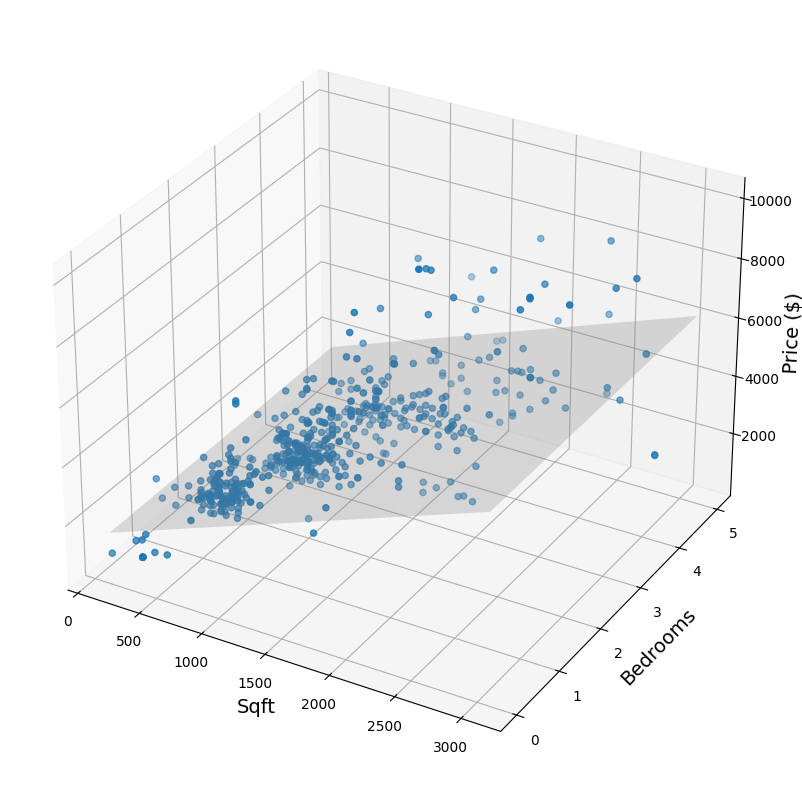

In [25]:
# Plot data and fitted model

# Create grid for prediction surface
Xvals=np.linspace(min(rent['sqft']), max(rent['sqft']),20)
Yvals=np.linspace(min(rent['beds']), max(rent['beds']),20)
Xg, Yg = np.meshgrid(Xvals, Yvals)
Zvals = np.array(multRegModel.intercept_[0] + (Xg * multRegModel.coef_[0,0] +  Yg * multRegModel.coef_[0,1]))

# Plot data and surface
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()
ax.scatter(rent[['sqft']], rent[['beds']], rent[['price']], color='#1f77b4')
ax.set_xlabel('Sqft', fontsize=14)
ax.set_ylabel('Bedrooms', fontsize=14)
ax.set_zlabel('Price ($)', fontsize=14)
ax.plot_surface(Xg, Yg, Zvals, alpha=.25, color='grey')
plt.show()

Add your code below to predict price from square footage, bedrooms, and bathrooms using a multiple regression model

In [26]:
# Define input and output features
X = rent[['sqft', 'beds', 'baths']].values.reshape(-1, 3)
y = rent[['price']].values.reshape(-1, 1)

In [27]:
# Initialize a multiple regression model
# Fit a multiple regression model
multRegModel_3Features = LinearRegression().fit(X, y)

 Print the predicted rental price for a 2,500 square foot rental with 2 bedrooms and 2 bathrooms.

In [28]:
# Print the predicted rental price for a 2,500 square foot rental with 2 bedrooms and 2 bathrooms.
print("Predicted Price of a 2,500 sqft Rental with 2 Bedrooms and 2 Bathrooms: ", multRegModel_3Features.predict([[2500, 2, 2]]))

Predicted Price of a 2,500 sqft Rental with 2 Bedrooms and 2 Bathrooms:  [[5297.68078461]]


(optional) Plot data and fitted model (extra credit: 5 points)

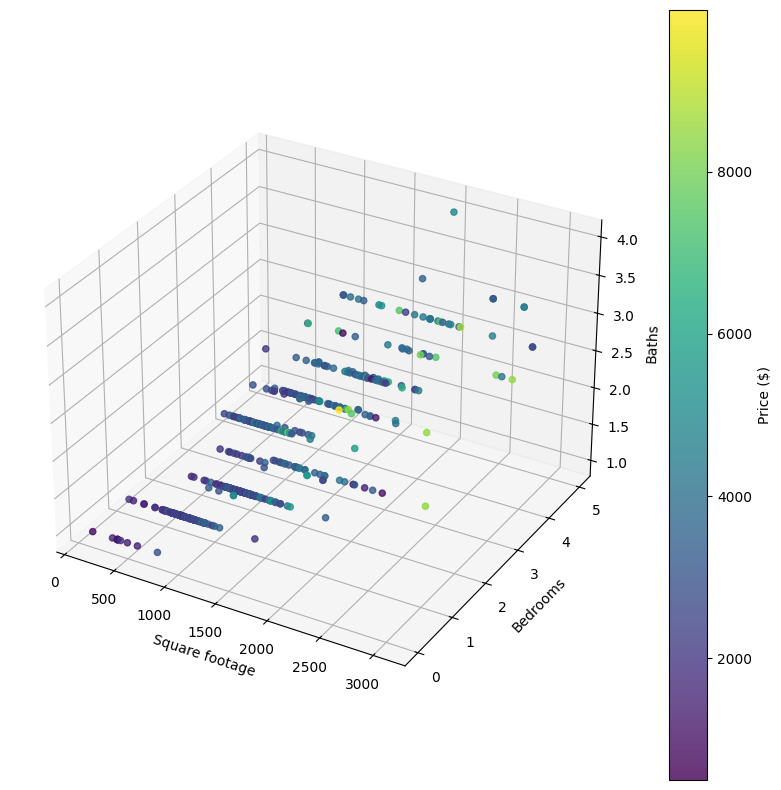

In [29]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()
x = rent[['sqft']]
y = rent[['beds']]
z = rent[['baths']]
c = rent[['price']]
img = ax.scatter(x, y, z, c=c, cmap = 'viridis', alpha = 0.8)
ax.set_xlabel('Square footage', fontsize=10)
ax.set_ylabel('Bedrooms', fontsize=10)
ax.set_zlabel('Baths', fontsize=10)
fig.colorbar(img, ax=ax, label='Price ($)')
plt.show()